# Fractional Brownian Motion Parameter Estimation Using Variance Aggregation

Consider a time series of $n$, identically distributed samples,</br>

$
\begin{align}
X_1, X_2,X_3,\ldots,X_n
\end{align}
$

Divide the series into $d$ smaller series of length $m$ where $md=n$.\ and let,</br>
$k = 0,1,2,3,\ldots,d-1$ and define the aggregated sum by,

$
\begin{align}
X_k^m &= \frac{1}{m}\left( X_{km+1} + X_{km+2} + \cdots + X_{km+m-1} + X_{km+m} \right) \\
&= \frac{1}{m} \left( X_{km+1} + \cdots + X_{(k+1)m} \right) \\
&= \frac{1}{m} \sum_{i=km+1}^{(k+1)m} X_i
\end{align}
$

The aggregated mean is given by,

$
\begin{align}
\text{E}[X^m] &= \frac{1}{d}\sum_{i=1}^d X_i^m \\
&= \frac{1}{dm} \sum_{i=1}^d \sum_{j=im+1}^{(k+1)i} X_j \\
&= \frac{1}{n} \sum_{i=1}^n X_i
\end{align}
$

and the aggregated variance by,

$
\begin{align}
\text{Var}[X^m] = \frac{1}{d} \sum_{i=1}^d\left( X^m_i - \text{E}[X^m] \right)^2
\end{align}
$

This method makes use of the self similarity of fractional brownian motion. Consider the aggregated process,

$
\begin{align}
X_0^m = \frac{1}{m} \sum_{i=1}^m X_i
\end{align}
$

From self similarity of fractional brownian motion,

$
\begin{align}
X_{ai} \sim a^H X_i
\end{align}
$

Since the distribution of the sum of Gaussian random variables is the distribution of the last it follows that,</br> 

$
\begin{align}
X_0^m \sim \frac{1}{m} X_m \sim \frac{m^H}{m} X_1 = m^{H-1} X_1
\end{align}
$

For fractional brownian noise,

$
\begin{align}
&\text{E}[\Delta Z^H_t] = 0 \\
&\text{Var}[\Delta Z^H_t] = \Delta t^{2H}
\end{align}
$

$X_1$ is a single increment of brownian motion it follows that,

$
\begin{align}
\text{Var}[X_1] = \Delta t^{2H} = \sigma^2
\end{align}
$

so,

$
\begin{align}
\text{Var}[X_0^m] = \text{Var}[m^{H-1} X_1] = m^{2(H-1)}\text{Var}[X_1] = \sigma^2 m^{2(H-1)}
\end{align}
$

From stationarity of it follows that,

$
\begin{align}
\text{Var}[X_k^m] = \sigma^2 m^{2(H-1)}
\end{align}
$

It follows that $H$ can be determined by using OLS on $\text{Var}[X_k^m]$ as a function of $m$.

## Imports

In [15]:
%reload_ext autoreload
%autoreload 2

# import system modules and set local import path
import os
import sys
import numpy
from matplotlib import pyplot

sys.path.insert(0, os.path.abspath('../..'))

# import local modules
from lib import fbm
from lib import bm
from lib import plots
from lib import config
from lib import stats

# Config Plot Style
pyplot.style.use(config.glyfish_style)

## Helpers

In [16]:
Δt = 1.0
npts = 2**10
nagg = 100
m = [1, 10, 50]

## Simulation $H=0.8$

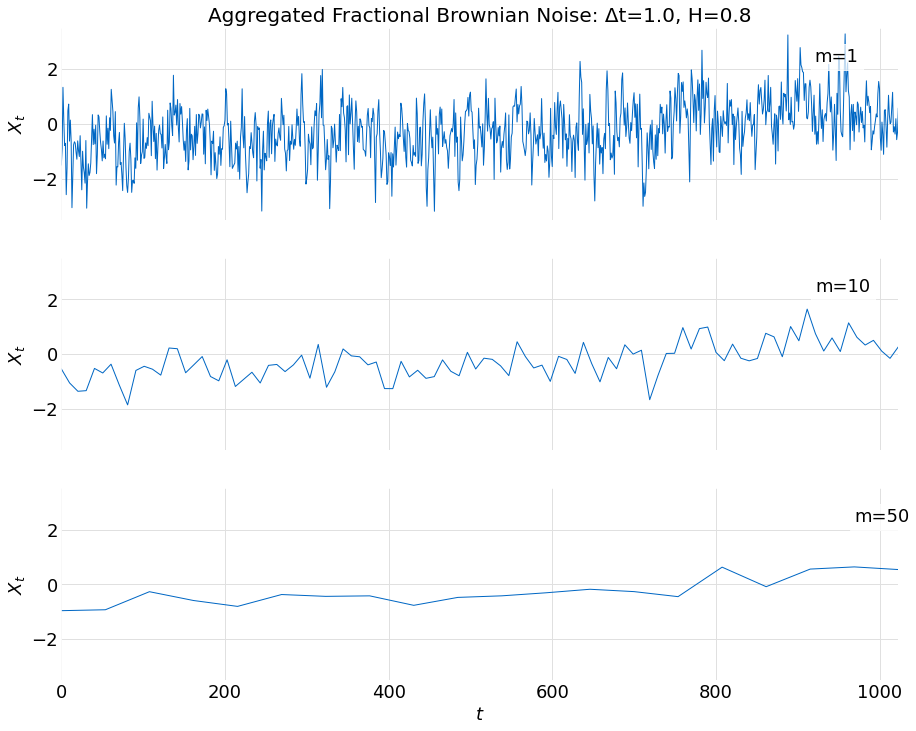

In [17]:
H = 0.8

title = f"Aggregated Fractional Brownian Noise: Δt={Δt}, H={H}"
labels = [f"m={m[0]}", f"m={m[1]}", f"m={m[2]}"]

samples = fbm.fft_noise(H, npts, Δt)
series = fbm.agg_series(samples, m)
time = fbm.agg_time(samples, m)

plots.time_series_stack(series, [-3.5, 3.5], labels, title, time)

In [18]:
m_vals = plots.logspace(nagg, npts)
agg_var = fbm.agg_var(samples, m_vals)
results = stats.OLS(agg_var, m_vals, stats.RegressionType.LOG)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     1009.
Date:                Sat, 19 Mar 2022   Prob (F-statistic):           2.13e-53
Time:                        20:28:41   Log-Likelihood:                 216.01
No. Observations:                 100   AIC:                            -428.0
Df Residuals:                      98   BIC:                            -422.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1037      0.015     -7.067      0.000      -0.133      -0.075
x1            -0.3040      0.010    -31.767      0.000      -0.323      -0.285
==============================================================================
Omnibus:                        0.924   Durbin-Watson:                   0.879
Prob(Omnibus):                  0.630   Jarque-Bera (JB):                0.485
Skew:                          -0.120   Prob(JB):                        0.785
Kurtosis:                       3.243   Cond. No.                         11.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

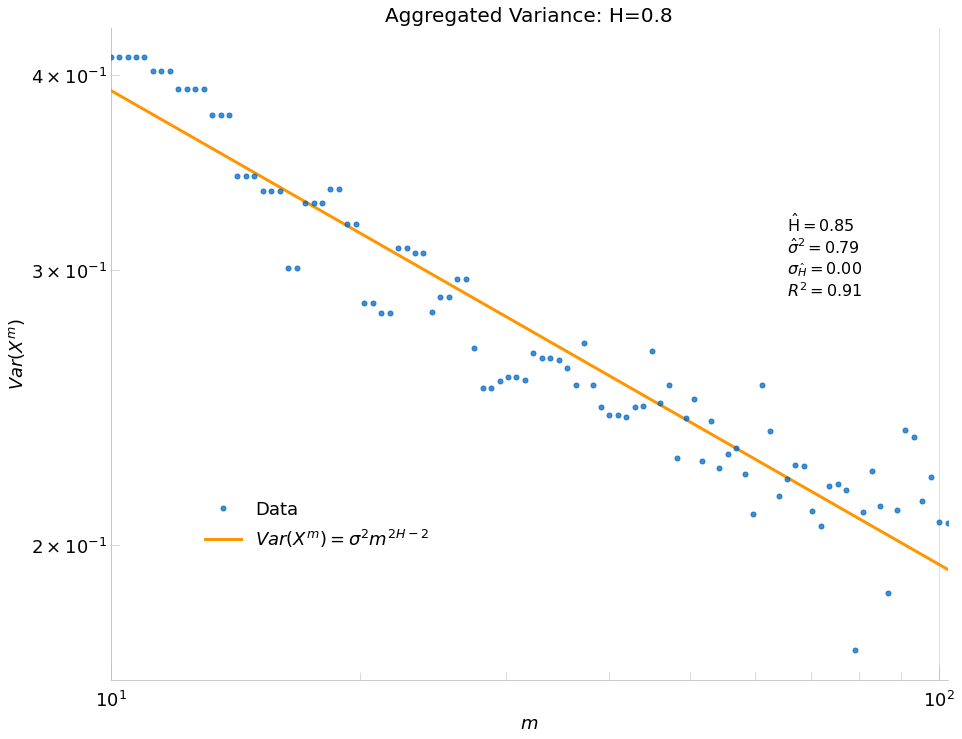

In [19]:
title = title = f"Aggregated Variance: H={H}"
plots.regression(agg_var, m_vals, results, title, plots.RegressionPlotType.FBM_AGG_VAR)

## Simulation $H=0.6$

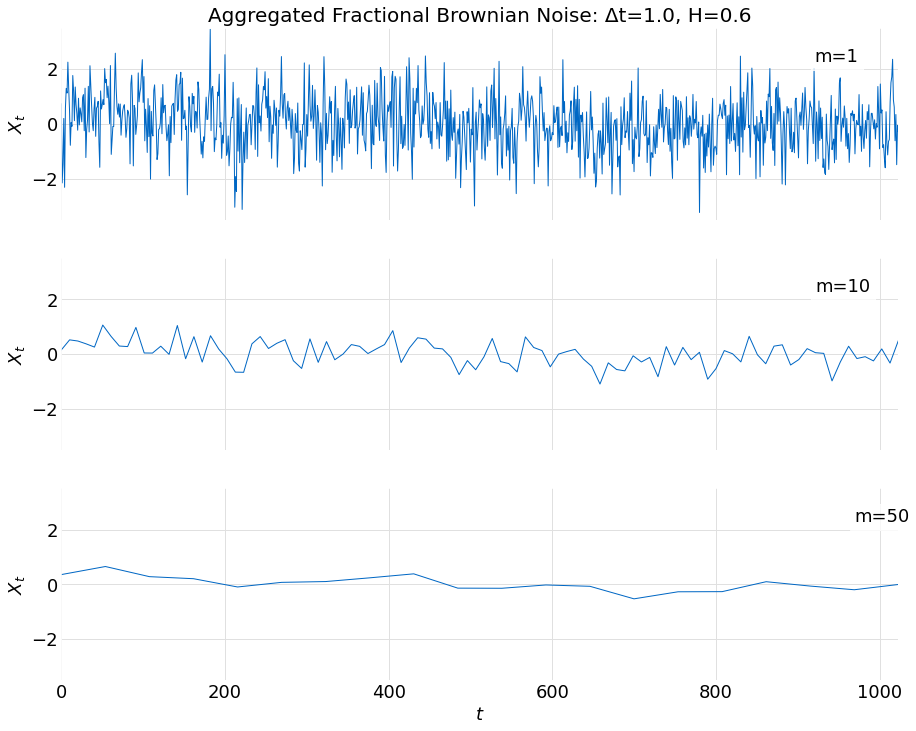

In [20]:
H = 0.6

title = f"Aggregated Fractional Brownian Noise: Δt={Δt}, H={H}"
labels = [f"m={m[0]}", f"m={m[1]}", f"m={m[2]}"]

samples = fbm.fft_noise(H, npts, Δt)
series = fbm.agg_series(samples, m)
time = fbm.agg_time(samples, m)

plots.time_series_stack(series, [-3.5, 3.5], labels, title, time)

In [21]:
m_vals = plots.logspace(nagg, npts)
agg_var = fbm.agg_var(samples, m_vals)
results = stats.OLS(agg_var, m_vals, stats.RegressionType.LOG)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     1527.
Date:                Sat, 19 Mar 2022   Prob (F-statistic):           1.42e-61
Time:                        20:28:41   Log-Likelihood:                 183.57
No. Observations:                 100   AIC:                            -363.1
Df Residuals:                      98   BIC:                            -357.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2381      0.020    -11.731      0.000      -0.278      -0.198
x1            -0.5172      0.013    -39.082      0.000      -0.543      -0.491
==============================================================================
Omnibus:                        2.464   Durbin-Watson:                   0.939
Prob(Omnibus):                  0.292   Jarque-Bera (JB):                2.173
Skew:                           0.062   Prob(JB):                        0.337
Kurtosis:                       3.711   Cond. No.                         11.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

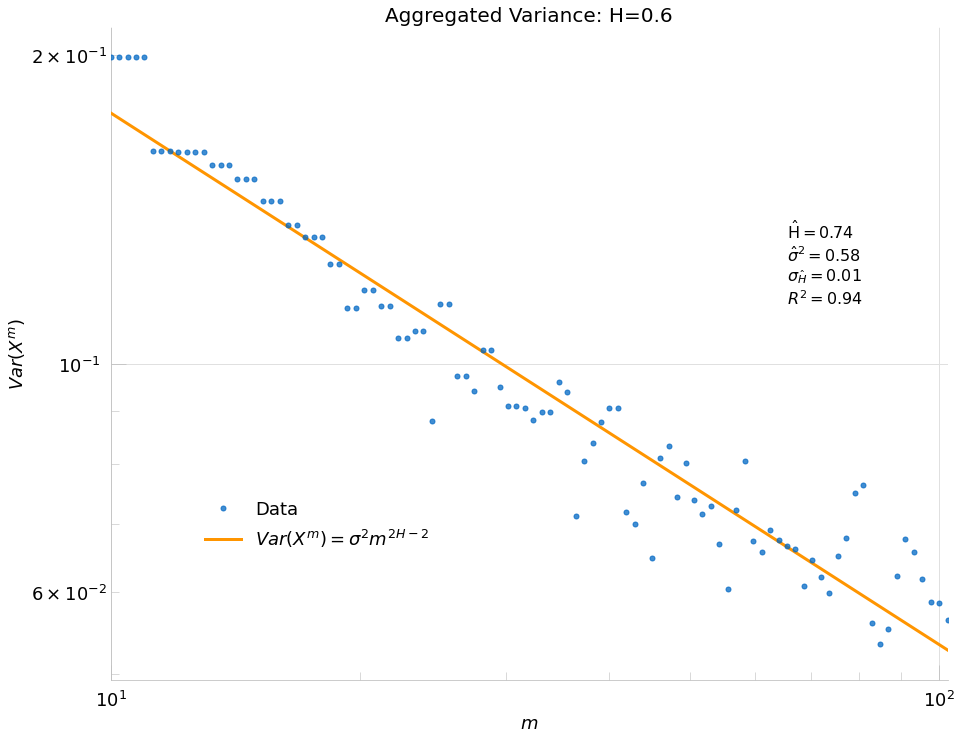

In [22]:
title = title = f"Aggregated Variance: H={H}"
plots.regression(agg_var, m_vals, results, title, plots.RegressionPlotType.FBM_AGG_VAR)

## Simulation $H=0.4$

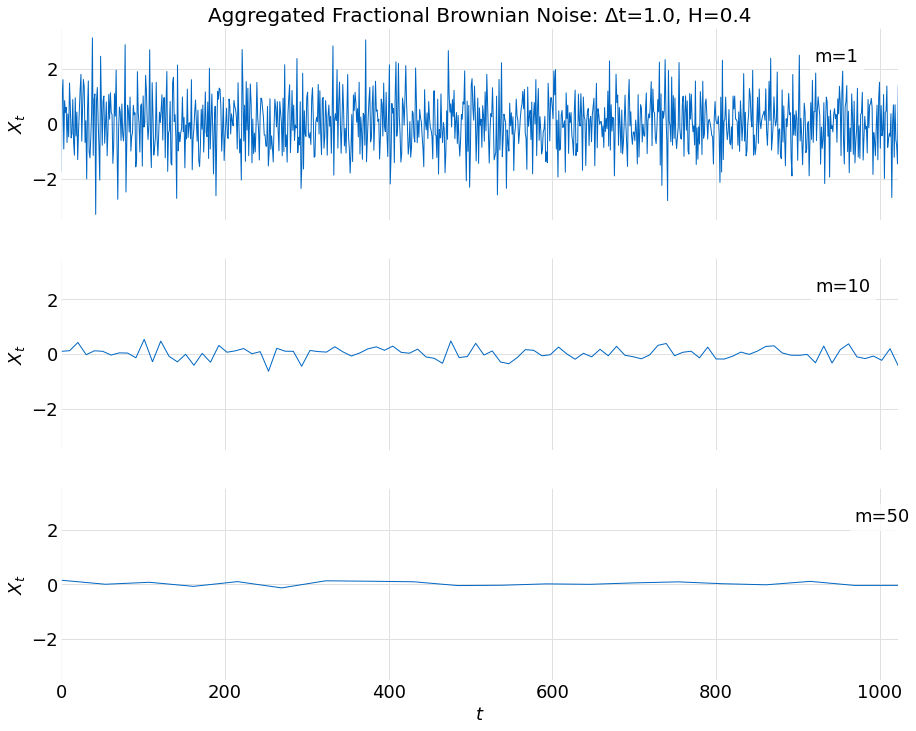

In [23]:
H = 0.4

title = f"Aggregated Fractional Brownian Noise: Δt={Δt}, H={H}"
labels = [f"m={m[0]}", f"m={m[1]}", f"m={m[2]}"]

samples = fbm.fft_noise(H, npts, Δt)
series = fbm.agg_series(samples, m)
time = fbm.agg_time(samples, m)

plots.time_series_stack(series, [-3.5, 3.5], labels, title, time)

In [24]:
m_vals = plots.logspace(nagg, npts)
agg_var = fbm.agg_var(samples, m_vals)
results = stats.OLS(agg_var, m_vals, stats.RegressionType.LOG)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     1694.
Date:                Sat, 19 Mar 2022   Prob (F-statistic):           1.20e-63
Time:                        20:28:42   Log-Likelihood:                 99.458
No. Observations:                 100   AIC:                            -194.9
Df Residuals:                      98   BIC:                            -189.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0588      0.047     -1.248      0.215      -0.152       0.035
x1            -1.2630      0.031    -41.153      0.000      -1.324      -1.202
==============================================================================
Omnibus:                        2.203   Durbin-Watson:                   1.539
Prob(Omnibus):                  0.332   Jarque-Bera (JB):                1.837
Skew:                           0.038   Prob(JB):                        0.399
Kurtosis:                       3.660   Cond. No.                         11.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

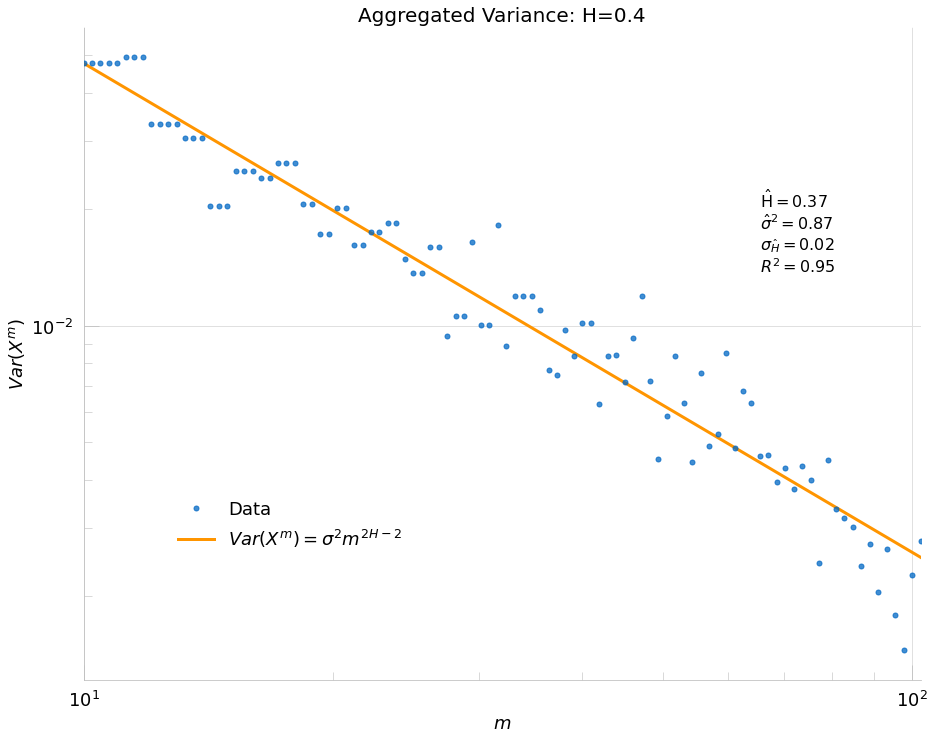

In [25]:
title = title = f"Aggregated Variance: H={H}"
plots.regression(agg_var, m_vals, results, title, plots.RegressionPlotType.FBM_AGG_VAR)

## Simulation $H=0.2$

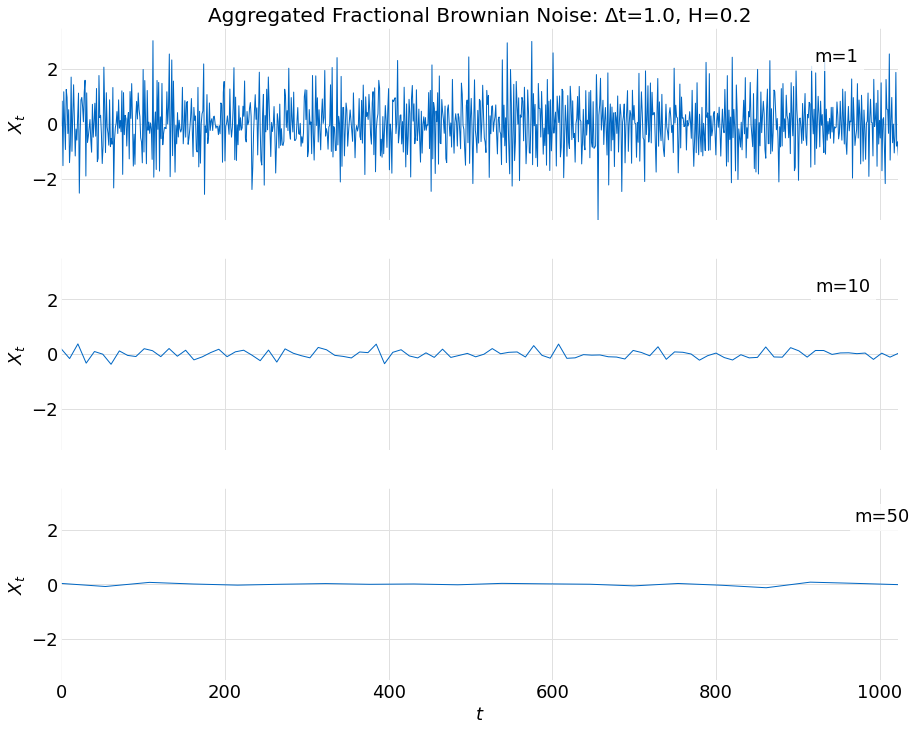

In [26]:
H = 0.2

title = f"Aggregated Fractional Brownian Noise: Δt={Δt}, H={H}"
labels = [f"m={m[0]}", f"m={m[1]}", f"m={m[2]}"]

samples = fbm.fft_noise(H, npts, Δt)
series = fbm.agg_series(samples, m)
time = fbm.agg_time(samples, m)

plots.time_series_stack(series, [-3.5, 3.5], labels, title, time)

In [27]:
m_vals = plots.logspace(nagg, npts)
agg_var = fbm.agg_var(samples, m_vals)
results = stats.OLS(agg_var, m_vals, stats.RegressionType.LOG)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     1940.
Date:                Sat, 19 Mar 2022   Prob (F-statistic):           2.15e-66
Time:                        20:28:42   Log-Likelihood:                 90.241
No. Observations:                 100   AIC:                            -176.5
Df Residuals:                      98   BIC:                            -171.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1008      0.052     -1.954      0.054      -0.203       0.002
x1            -1.4824      0.034    -44.049      0.000      -1.549      -1.416
==============================================================================
Omnibus:                        0.141   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.932   Jarque-Bera (JB):                0.300
Skew:                          -0.061   Prob(JB):                        0.861
Kurtosis:                       2.761   Cond. No.                         11.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

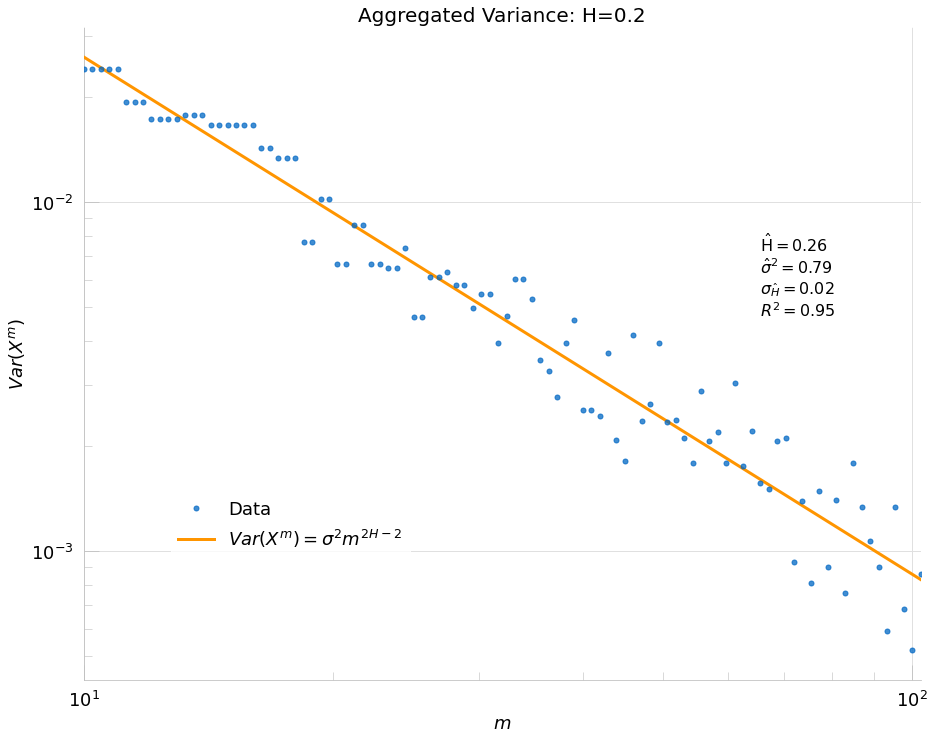

In [28]:
title = title = f"Aggregated Variance: H={H}"
plots.regression(agg_var, m_vals, results, title, plots.RegressionPlotType.FBM_AGG_VAR)